In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('outputs/np_train_skills_no_commas.csv')

In [77]:
df.describe()

,Unnamed: 0,Target
count,19769.000000,13004.000000
mean,9884.000000,0.304445
std,5706.963072,0.460190
min,0.000000,0.000000
25%,4942.000000,0.000000
50%,9884.000000,0.000000
75%,14826.000000,1.000000
max,19768.000000,1.000000


In [78]:
df.head()

,Unnamed: 0,Phrase,Target
0,0,significant scope impact,0.0
1,1,monitor compliance,0.0
2,2,self-service reporting solutions,0.0
3,3,experience,0.0
4,4,strong attention detail commitment,1.0


In [79]:
df.isnull().sum()

Unnamed: 0       0
Phrase           1
Target        6765
dtype: int64

In [80]:
#drop french phrases and extra data
df = df.dropna()
df.isnull().sum()

Unnamed: 0    0
Phrase        0
Target        0
dtype: int64

In [81]:
len(df)

13004

In [75]:
print('Phrase Index with most characters is: ', df['Phrase'].str.len().idxmax())

Phrase Index with most words is:  6593


In [82]:
df['Phrase'][6593]

'www.canada.ca/en/treasury-board-secretariat/services/professional-development/key-leadership-competency-profile/examples-effective-ineffective-behaviours.html create vision strategy'

In [83]:
df.sample(50, random_state = 5)

,Unnamed: 0,Phrase,Target
4397,4397,credit risk management modeling,1.0
18061,18061,adopt,0.0
3872,3872,contact member,0.0
11332,11332,various scope,0.0
18005,18005,handled,0.0
1321,1321,primary responsibilities,0.0
802,802,related technical field,1.0
4508,4508,considerable latitude exercise,0.0
9352,9352,baselining,1.0
8507,8507,high quality data,0.0


<AxesSubplot:xlabel='Target', ylabel='Counts'>

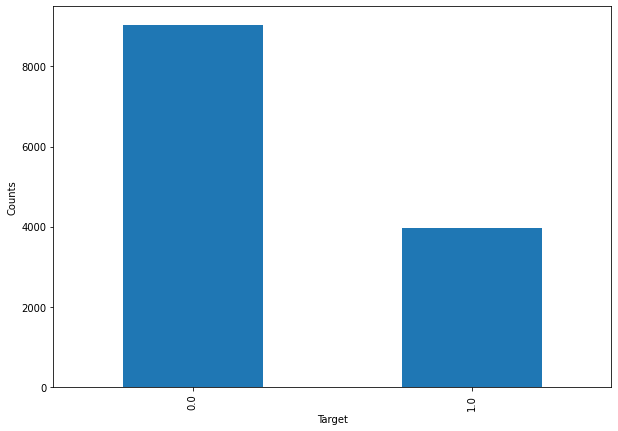

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))

plt.xlabel("Target")
plt.ylabel("Counts")

df["Target"].value_counts().plot(kind='bar')

In [85]:
from collections import Counter

#count unique words
def counter_word(text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    return count

In [86]:
text = df['Phrase']
counter = counter_word(text)

In [87]:
len(counter)

5772

In [88]:
counter

Counter({'significant': 19,
         'scope': 13,
         'impact': 53,
         'monitor': 9,
         'compliance': 16,
         'self-service': 5,
         'reporting': 29,
         'solutions': 151,
         'experience': 411,
         'strong': 127,
         'attention': 16,
         'detail': 19,
         'commitment': 14,
         'recombination': 1,
         'techniques': 54,
         'test': 19,
         'cases': 14,
         'aim': 3,
         'work': 276,
         'job': 76,
         'requirements': 80,
         'day': 21,
         'individuals': 25,
         'delivery': 42,
         'network': 22,
         '—': 7,
         'accenture': 6,
         'quantitative': 41,
         'analysis': 145,
         'tests': 10,
         'problems': 61,
         'everyone': 16,
         'expert': 21,
         'everything': 12,
         'long': 4,
         'term': 10,
         'equity': 18,
         'lightspeeders': 1,
         'implantable': 1,
         'medical': 16,
         'device': 

In [89]:
num_words = len(counter)

In [90]:
#max number of words in a sequence





#replace with length of longest string
max_length = 20

In [91]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split( df['Phrase'], df['Target'], test_size=0.2, random_state=None)

In [124]:
def split_train_test(features, target, size):
    #size is the size of the training set
    train_size = int(features.shape[0]* size) #check me
    X_train = features[:train_size]
    y_train = target[:train_size]

    X_test = features[train_size:]
    y_test = target[train_size:]
    return X_train, y_train, X_test, y_test

In [ ]:
train = df[['Phrase','Target']]
features = train['Phrase']
target = train['Target']
split_train_test(features, target, 0.8)

In [93]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train)

In [94]:
word_index = tokenizer.word_index
word_index

{'data': 1,
 'experience': 2,
 'business': 3,
 'team': 4,
 'work': 5,
 'development': 6,
 'skills': 7,
 'analytics': 8,
 'science': 9,
 'solutions': 10,
 'management': 11,
 'technical': 12,
 '’': 13,
 'knowledge': 14,
 'analysis': 15,
 'product': 16,
 'ability': 17,
 'strong': 18,
 'environment': 19,
 'machine': 20,
 'time': 21,
 'software': 22,
 'new': 23,
 'engineering': 24,
 'tools': 25,
 'design': 26,
 'support': 27,
 'opportunity': 28,
 'ai': 29,
 'research': 30,
 'models': 31,
 'high': 32,
 'technology': 33,
 'company': 34,
 'learning': 35,
 'cloud': 36,
 'teams': 37,
 'technologies': 38,
 'projects': 39,
 'process': 40,
 'analytical': 41,
 'job': 42,
 'complex': 43,
 'customer': 44,
 'statistical': 45,
 'requirements': 46,
 'industry': 47,
 'products': 48,
 'systems': 49,
 'quality': 50,
 'role': 51,
 'services': 52,
 'performance': 53,
 'problems': 54,
 'information': 55,
 'people': 56,
 'degree': 57,
 'understanding': 58,
 'world': 59,
 'python': 60,
 'sql': 61,
 'insights': 6

In [95]:
train_sequences = tokenizer.texts_to_sequences(X_train)

In [96]:
train_sequences[0]

[290, 463, 72]

In [97]:
from keras.preprocessing.sequence import pad_sequences

train_padded = pad_sequences(
    train_sequences, maxlen=max_length, padding="post", truncating="post"
)

In [98]:
train_padded[0]

array([290, 463,  72,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [99]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(
    test_sequences, maxlen=max_length, padding="post", truncating="post"
)

In [100]:
#check inverse
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [101]:
def decode(text):
    return " ".join([reverse_word_index.get(i, "?") for i in text])

In [102]:
decode(train_sequences[0])

'significant scope impact'

In [103]:
print(df['Phrase'][0])

significant scope impact


In [104]:
print(train_padded.shape)
print(test_padded.shape)
#find out if the weight of the tokens affect the accuracy of the lstm

(10403, 20)
(2601, 20)


In [105]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.initializers import Constant

model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.Embedding(num_words, 32, input_length=max_length),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])



In [106]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

In [107]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 32)            184704    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 209,601
Trainable params: 209,601
Non-trainable params: 0
_________________________________________________________________


In [108]:
history = model.fit(
    train_padded, y_train, epochs=15, validation_split=0.2
)


Epoch 1/100


2021-08-08 17:34:08.436734: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-08 17:34:08.546764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-08 17:34:08.654850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - ETA: 0s - loss: 0.6937 - accuracy: 0.6370

2021-08-08 17:34:16.247828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-08 17:34:16.285067: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - 9s 30ms/step - loss: 0.6937 - accuracy: 0.6370 - val_loss: 0.6659 - val_accuracy: 0.7751
Epoch 2/100
261/261 [==============================] - 8s 29ms/step - loss: 0.6595 - accuracy: 0.6467 - val_loss: 0.5336 - val_accuracy: 0.7751
Epoch 3/100
261/261 [==============================] - 8s 29ms/step - loss: 0.6781 - accuracy: 0.6347 - val_loss: 0.9022 - val_accuracy: 0.2249
Epoch 4/100
261/261 [==============================] - 8s 30ms/step - loss: 0.6659 - accuracy: 0.6413 - val_loss: 0.5353 - val_accuracy: 0.7751
Epoch 5/100
261/261 [==============================] - 8s 32ms/step - loss: 0.6662 - accuracy: 0.6452 - val_loss: 0.5508 - val_accuracy: 0.7751
Epoch 6/100
261/261 [==============================] - 8s 30ms/step - loss: 0.6568 - accuracy: 0.6526 - val_loss: 0.7309 - val_accuracy: 0.2249
Epoch 7/100
261/261 [==============================] - 8s 30ms/step - loss: 0.6603 - accuracy: 0.6466 - val_loss: 0.6071 - val_accuracy: 0.7751
Epoc

In [109]:
def accuracy_loss_plot(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Model accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Val'], loc='lower right')

    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model loss')
    ax2.set_ylabel('loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Val'], loc='upper right')

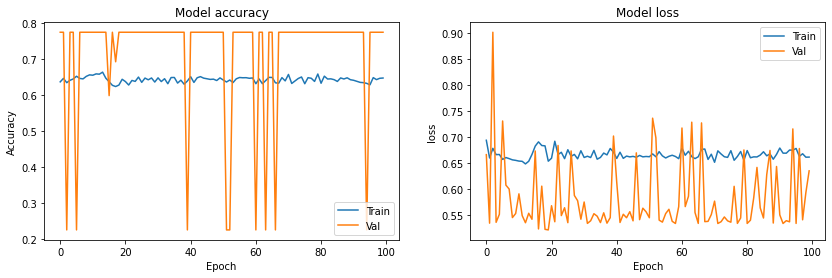

In [110]:
accuracy_loss_plot(history)

In [111]:
accr = model.evaluate(test_padded,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))


82/82 [==============================] - 1s 10ms/step - loss: 0.6483 - accuracy: 0.7178
Test set
  Loss: 0.648
  Accuracy: 0.718


In [112]:
from tqdm import tqdm
from keras.layers import Dense,SpatialDropout1D
from nltk.tokenize import word_tokenize

def create_corpus(df):
    corpus=[]
    for phrase in tqdm(df['Phrase']):
        words=[word.lower() for word in word_tokenize(phrase) if(word.isalpha()==1)]
        corpus.append(words)
    return corpus

In [113]:
corpus=create_corpus(df)


100%|██████████████████████████████████| 13004/13004 [00:00<00:00, 25972.52it/s]


In [115]:
embedding_dict={}
with open('GloVe/glove.6B.100d.txt','r') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

In [116]:
MAX_LEN=20
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences=tokenizer_obj.texts_to_sequences(corpus)

phrase_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

In [117]:
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 4974


In [118]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue
    
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec

100%|███████████████████████████████████| 4974/4974 [00:00<00:00, 245014.19it/s]


In [122]:
model_embed = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False),
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])


opt = tf.keras.optimizers.Adam(learning_rate=1e-5)

model_embed.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [123]:
model_embed.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 100)           497500    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 20, 100)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 539,805
Trainable params: 42,305
Non-trainable params: 497,500
_________________________________________________________________


In [125]:
X_train, y_train, X_test, y_test = split_train_test(phrase_pad, df['Target'], 0.8)

In [126]:
history=model_embed.fit(X_train,y_train,batch_size=4,epochs=15,validation_split=0.2,verbose=2)

Epoch 1/15


2021-08-08 20:19:07.008322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-08 20:44:12.668813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2081/2081 - 1528s - loss: 0.6759 - accuracy: 0.6674 - val_loss: 0.6061 - val_accuracy: 0.7751
Epoch 2/15
2081/2081 - 1533s - loss: 0.6048 - accuracy: 0.6812 - val_loss: 0.4821 - val_accuracy: 0.7996
Epoch 3/15
2081/2081 - 1539s - loss: 0.5387 - accuracy: 0.7337 - val_loss: 0.4629 - val_accuracy: 0.7761
Epoch 4/15
2081/2081 - 1541s - loss: 0.5167 - accuracy: 0.7491 - val_loss: 0.4601 - val_accuracy: 0.7669
Epoch 5/15
2081/2081 - 1562s - loss: 0.5125 - accuracy: 0.7507 - val_loss: 0.4553 - val_accuracy: 0.7713
Epoch 6/15
2081/2081 - 1556s - loss: 0.5100 - accuracy: 0.7541 - val_loss: 0.4529 - val_accuracy: 0.7737
Epoch 7/15
2081/2081 - 1535s - loss: 0.5019 - accuracy: 0.7578 - val_loss: 0.4542 - val_accuracy: 0.7703
Epoch 8/15
2081/2081 - 1515s - loss: 0.4989 - accuracy: 0.7611 - val_loss: 0.4494 - val_accuracy: 0.7761
Epoch 9/15
2081/2081 - 1536s - loss: 0.4944 - accuracy: 0.7628 - val_loss: 0.4410 - val_accuracy: 0.7852
Epoch 10/15
2081/2081 - 1513s - loss: 0.4952 - accuracy: 0.7609 - 

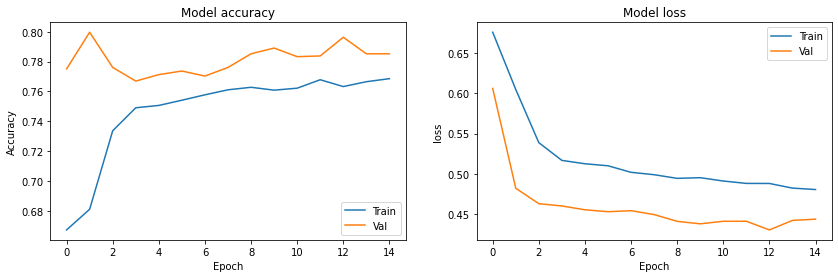

In [127]:
accuracy_loss_plot(history)

In [130]:
accr = model_embed.evaluate(X_test,y_test)
print('Test set\n  Loss for model embed: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

82/82 [==============================] - 4s 45ms/step - loss: 0.4878 - accuracy: 0.7401
Test set
  Loss for model embed: 0.488
  Accuracy: 0.740


In [ ]:
#BERT model
#Show the skills extracted for 10 posts for BERT and best LSTM model